<a href="https://colab.research.google.com/github/limu050404/CS361-Homework/blob/main/Homework2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
coke_file = pd.read_csv('https://raw.githubusercontent.com/limu050404/CS361-Homework/main/KO.csv')
coke_file

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,58.820000,59.310001,58.380001,59.299999,59.299999,20187300
1,2022-01-04,59.730000,60.540001,59.590000,60.290001,60.290001,26141600
2,2022-01-05,60.090000,61.200001,60.049999,60.790001,60.790001,22507300
3,2022-01-06,60.470001,61.119999,60.439999,60.470001,60.470001,17902300
4,2022-01-07,60.279999,60.720001,60.060001,60.330002,60.330002,12307400
5,2022-01-10,60.549999,60.820000,60.180000,60.430000,60.430000,20954300
6,2022-01-11,60.430000,60.490002,59.840000,60.450001,60.450001,19369600
7,2022-01-12,60.529999,60.689999,60.189999,60.540001,60.540001,15753800
8,2022-01-13,60.540001,61.040001,60.389999,60.900002,60.900002,14318000
9,2022-01-14,60.939999,61.450001,60.360001,61.389999,61.389999,19726600


In [4]:
pepsi_file = pd.read_csv('https://raw.githubusercontent.com/limu050404/CS361-Homework/main/PEP.csv')
pepsi_file

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,172.199997,173.190002,170.570007,172.979996,172.979996,5488900
1,2022-01-04,172.660004,174.449997,172.199997,173.229996,173.229996,4717600
2,2022-01-05,173.360001,175.360001,173.229996,173.820007,173.820007,6564600
3,2022-01-06,173.910004,175.600006,173.229996,173.860001,173.860001,4288700
4,2022-01-07,174.089996,174.690002,172.610001,174.080002,174.080002,4916000
5,2022-01-10,174.440002,175.839996,173.619995,174.169998,174.169998,5055900
6,2022-01-11,173.679993,174.229996,171.619995,174.089996,174.089996,6452300
7,2022-01-12,173.899994,174.330002,172.949997,173.899994,173.899994,5268000
8,2022-01-13,173.710007,174.690002,173.240005,174.179993,174.179993,4310300
9,2022-01-14,174.570007,175.940002,173.399994,175.639999,175.639999,4474500


In [5]:
coke_close = coke_file['Close']
pepsi_close = pepsi_file['Close']
close_df = pd.DataFrame({'Coke': coke_close, 'Pepsi': pepsi_close})
close_df

,Coke,Pepsi
0,59.299999,172.979996
1,60.290001,173.229996
2,60.790001,173.820007
3,60.470001,173.860001
4,60.330002,174.080002
5,60.430000,174.169998
6,60.450001,174.089996
7,60.540001,173.899994
8,60.900002,174.179993
9,61.389999,175.639999


In [6]:
close_df.corr()

,Coke,Pepsi
Coke,1.000000,0.740486
Pepsi,0.740486,1.000000


Text(0, 0.5, 'PEP')

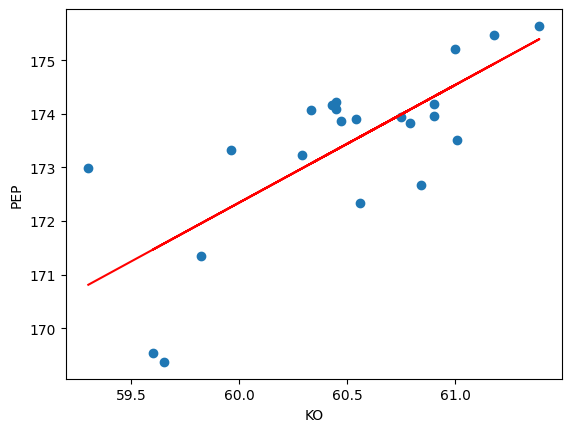

In [9]:
m, b = np.polyfit(coke_close, pepsi_close, 1)
plt.plot(coke_close, m*coke_close + b, color='red')
plt.scatter(coke_close, pepsi_close)
plt.xlabel('KO')
plt.ylabel('PEP')